In [1]:
from simpsons_paradox_data import *

In [2]:
joint_prob_table[gender_mapping['female'], department_mapping['C'], admission_mapping['admitted']]

0.044547061422890007

In [3]:
joint_prob_table

array([[[ 0.01956695,  0.00429518],
        [ 0.00375608,  0.00176757],
        [ 0.04454706,  0.08647371],
        [ 0.02899912,  0.0538555 ],
        [ 0.02083959,  0.06599205],
        [ 0.00527397,  0.07006849]],

       [[ 0.1130137 ,  0.06926646],
        [ 0.07794962,  0.04577994],
        [ 0.02656871,  0.04523862],
        [ 0.03040433,  0.06173   ],
        [ 0.01181617,  0.03038445],
        [ 0.00494476,  0.07746796]]])

In [4]:
joint_prob_table.sum(axis=0)

array([[ 0.13258065,  0.07356164],
       [ 0.0817057 ,  0.0475475 ],
       [ 0.07111578,  0.13171233],
       [ 0.05940345,  0.11558551],
       [ 0.03265577,  0.09637649],
       [ 0.01021874,  0.14753646]])

In [5]:
joint_prob_gender_admission = joint_prob_table.sum(axis=1)
joint_prob_gender_admission

array([[ 0.12298277,  0.2824525 ],
       [ 0.2646973 ,  0.32986743]])

In [6]:
import pandas as pd
# pd.set_option('precision', 17)
# pd.set_eng_float_format(accuracy=5)

In [7]:
department_mapping

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}

In [8]:
joint_prob_panel = pd.Panel(joint_prob_table, 
         items = gender_labels,
         major_axis = department_labels,
         minor_axis = admission_labels
        )
joint_prob_panel

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 6 (major_axis) x 2 (minor_axis)
Items axis: female to male
Major_axis axis: A to F
Minor_axis axis: admitted to rejected

In [9]:
joint_prob_panel.sum(axis=0)

,admitted,rejected
A,0.132581,0.073562
B,0.081706,0.047548
C,0.071116,0.131712
D,0.059403,0.115586
E,0.032656,0.096376
F,0.010219,0.147536


In [10]:
%matplotlib inline  

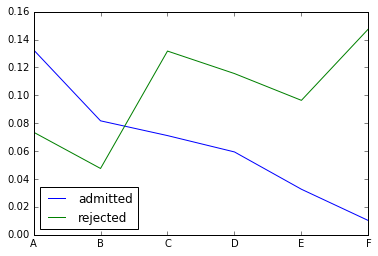

In [11]:
joint_prob_panel.sum(axis=0).plot()

In [12]:
joint_prob_panel.sum(axis=1)

,female,male
admitted,0.122983,0.264697
rejected,0.282452,0.329867


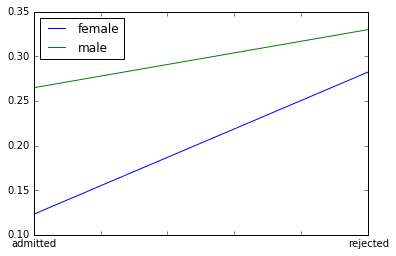

In [13]:
joint_prob_panel.sum(axis=1).plot()

In [14]:
joint_prob_panel.sum(axis=2)

,female,male
A,0.023862,0.182280
B,0.005524,0.123730
C,0.131021,0.071807
D,0.082855,0.092134
E,0.086832,0.042201
F,0.075342,0.082413


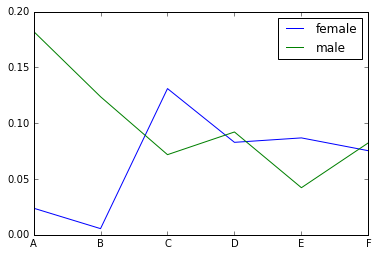

In [15]:
joint_prob_panel.sum(axis=2).plot()

In [16]:
joint_prob_panel.sum(axis=1)['female'].loc['admitted']

0.12298276623950503

In [17]:
female_only = joint_prob_gender_admission[gender_mapping['female']]
female_only

array([ 0.12298277,  0.2824525 ])

In [18]:
joint_prob_panel.sum(axis=1)['female']

admitted    0.122983
rejected    0.282452
Name: female, dtype: float64

In [19]:
prob_admission_given_female = female_only / np.sum(female_only)
prob_admission_given_female

array([ 0.30333515,  0.69666485])

In [20]:
joint_prob_panel.sum(axis=1)['female']/joint_prob_panel.sum(axis=1)['female'].sum()

admitted    0.303335
rejected    0.696665
Name: female, dtype: float64

In [21]:
prob_admission_given_female_dict = dict(zip(admission_labels, prob_admission_given_female))
print(prob_admission_given_female_dict)

{'admitted': 0.30333514986376009, 'rejected': 0.69666485013623991}


In [22]:
joint_prob_panel.sum(axis=1)['male']/joint_prob_panel.sum(axis=1)['male'].sum()

admitted    0.445195
rejected    0.554805
Name: male, dtype: float64

In [23]:
admitted_only = joint_prob_gender_admission[:, admission_mapping['admitted']]
admitted_only

array([ 0.12298277,  0.2646973 ])

In [24]:
joint_prob_panel.sum(axis=1).loc['admitted']

female    0.122983
male      0.264697
Name: admitted, dtype: float64

In [25]:
prob_gender_given_admitted = admitted_only / np.sum(admitted_only)
prob_gender_given_admitted_dict = dict(zip(gender_labels, prob_gender_given_admitted))
print(prob_gender_given_admitted_dict)

{'female': 0.31722746546300079, 'male': 0.68277253453699915}


In [26]:
joint_prob_panel.sum(axis=1).loc['admitted']/joint_prob_panel.sum(axis=1).loc['admitted'].sum()

female    0.317227
male      0.682773
Name: admitted, dtype: float64

In [27]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['A']]
female_and_A_only

array([ 0.01956695,  0.00429518])

In [28]:
joint_prob_table[gender_mapping['female'], department_mapping['B']]/joint_prob_table[gender_mapping['female'], department_mapping['B']].sum()

array([ 0.68,  0.32])

In [29]:
joint_prob_panel

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 6 (major_axis) x 2 (minor_axis)
Items axis: female to male
Major_axis axis: A to F
Minor_axis axis: admitted to rejected

In [30]:
joint_prob_panel['female'].loc['A']

admitted    0.019567
rejected    0.004295
Name: A, dtype: float64

In [31]:
joint_prob_panel['male'].loc['D']['admitted']/joint_prob_panel['male'].loc['D'].sum()

0.3300000000000004

In [32]:
joint_prob_panel['female'].loc['B']/joint_prob_panel['female'].loc['B'].sum()

admitted    0.68
rejected    0.32
Name: B, dtype: float64

In [33]:
joint_prob_panel['male']

,admitted,rejected
A,0.113014,0.069266
B,0.077950,0.045780
C,0.026569,0.045239
D,0.030404,0.061730
E,0.011816,0.030384
F,0.004945,0.077468


In [34]:
for d in department_labels:
    for g in gender_labels:
        print(g)
        print(joint_prob_panel[g].loc[d]/joint_prob_panel[g].loc[d].sum())
        print()

female
admitted    0.82
rejected    0.18
Name: A, dtype: float64

male
admitted    0.62
rejected    0.38
Name: A, dtype: float64

female
admitted    0.68
rejected    0.32
Name: B, dtype: float64

male
admitted    0.63
rejected    0.37
Name: B, dtype: float64

female
admitted    0.34
rejected    0.66
Name: C, dtype: float64

male
admitted    0.37
rejected    0.63
Name: C, dtype: float64

female
admitted    0.35
rejected    0.65
Name: D, dtype: float64

male
admitted    0.33
rejected    0.67
Name: D, dtype: float64

female
admitted    0.24
rejected    0.76
Name: E, dtype: float64

male
admitted    0.28
rejected    0.72
Name: E, dtype: float64

female
admitted    0.07
rejected    0.93
Name: F, dtype: float64

male
admitted    0.06
rejected    0.94
Name: F, dtype: float64

